In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os

In [4]:
# Load audio
debussy_file = os.path.join("audio", "debussy.wav")
redhot_file = os.path.join("audio", "redhot.wav")
duke_file = os.path.join("audio", "duke.wav")

debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

### Extract the Spectral Centroid

In [8]:
# Constants
FRAME_SIZE = 2048
HOP_SIZE = 512

# Extract the spectral centroids
sc_debussy = librosa.feature.spectral_centroid(
    y=debussy,
    n_fft=FRAME_SIZE,
    hop_length=HOP_SIZE
)[0]
sc_redhot = librosa.feature.spectral_centroid(
    y=redhot,
    n_fft=FRAME_SIZE,
    hop_length=HOP_SIZE
)[0]
sc_duke = librosa.feature.spectral_centroid(
    y=duke,
    n_fft=FRAME_SIZE,
    hop_length=HOP_SIZE
)[0]

### Visualize Spectral Centroids

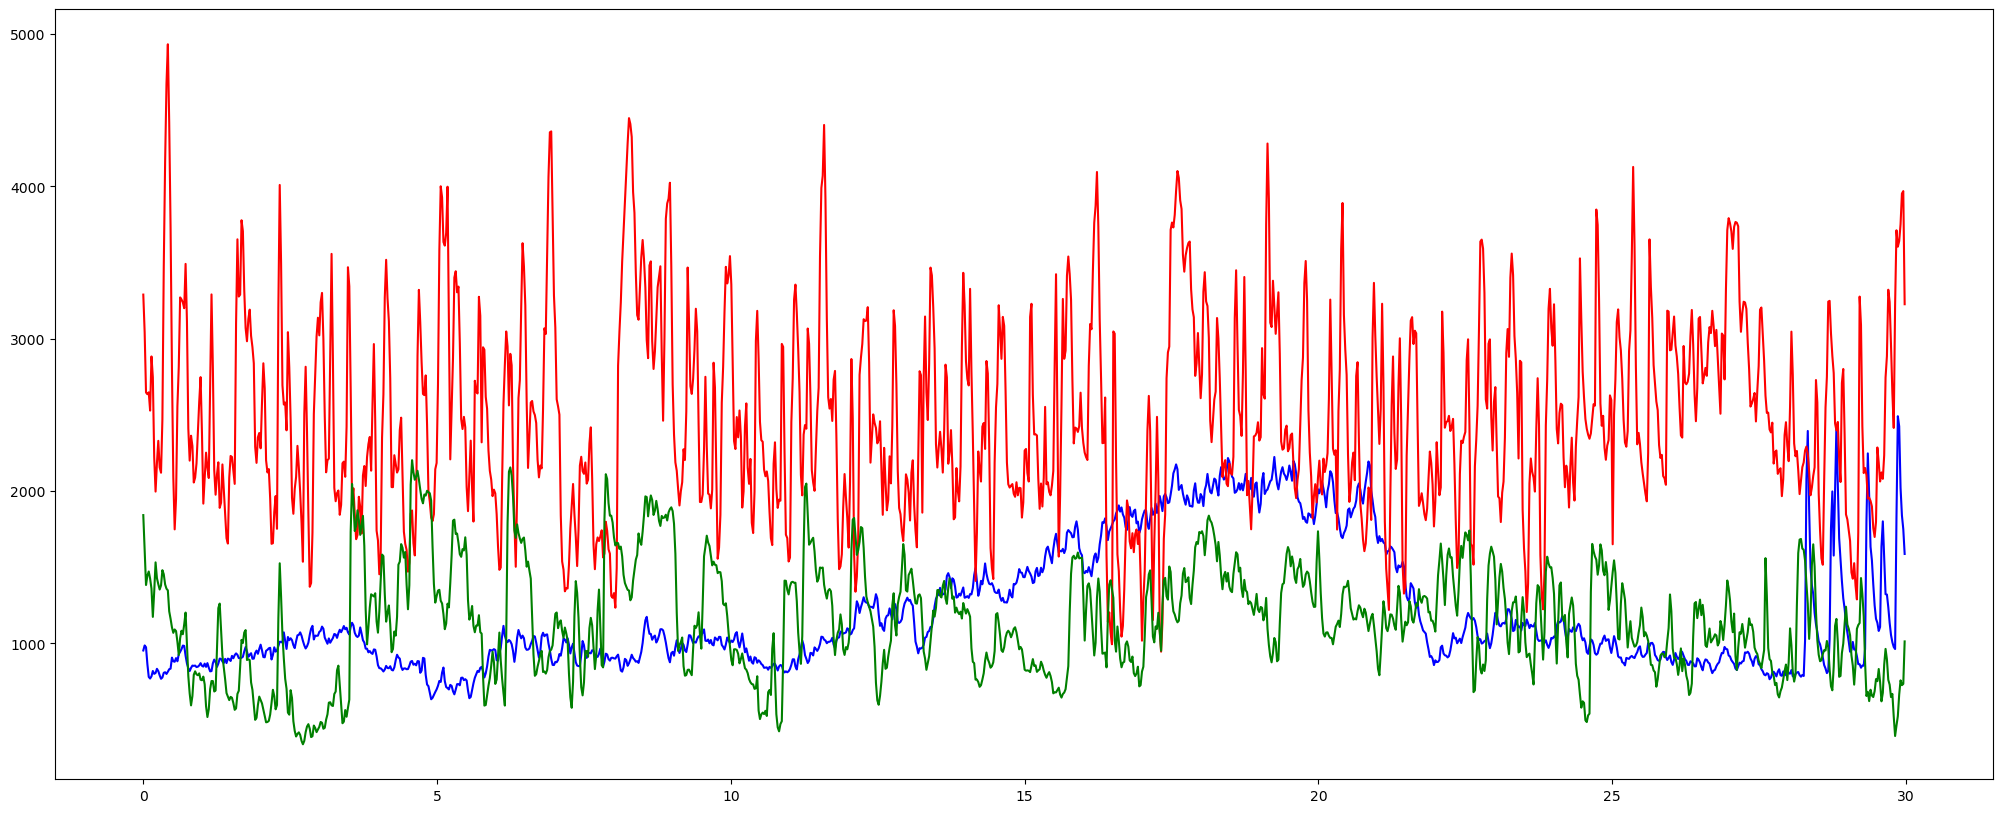

In [10]:
# Convert frames to times
frames = np.arange(stop=sc_debussy.shape[0])
t = librosa.frames_to_time(
    frames=frames, 
    sr=sr, 
    hop_length=HOP_SIZE
)

# Plot spectral centroids
plt.figure(figsize=(25, 10))

plt.plot(t, sc_debussy, color='b')
plt.plot(t, sc_redhot, color='r')
plt.plot(t, sc_duke, color='g')

plt.show()

### Calculate Spectral Bandwidths

In [11]:
# Extract the spectral bandwidths
bw_debussy = librosa.feature.spectral_bandwidth(
    y=debussy,
    n_fft=FRAME_SIZE,
    hop_length=HOP_SIZE
)[0]
bw_redhot = librosa.feature.spectral_bandwidth(
    y=redhot,
    n_fft=FRAME_SIZE,
    hop_length=HOP_SIZE
)[0]
bw_duke = librosa.feature.spectral_bandwidth(
    y=duke,
    n_fft=FRAME_SIZE,
    hop_length=HOP_SIZE
)[0]

### Visualize the Spectral Bandwidths

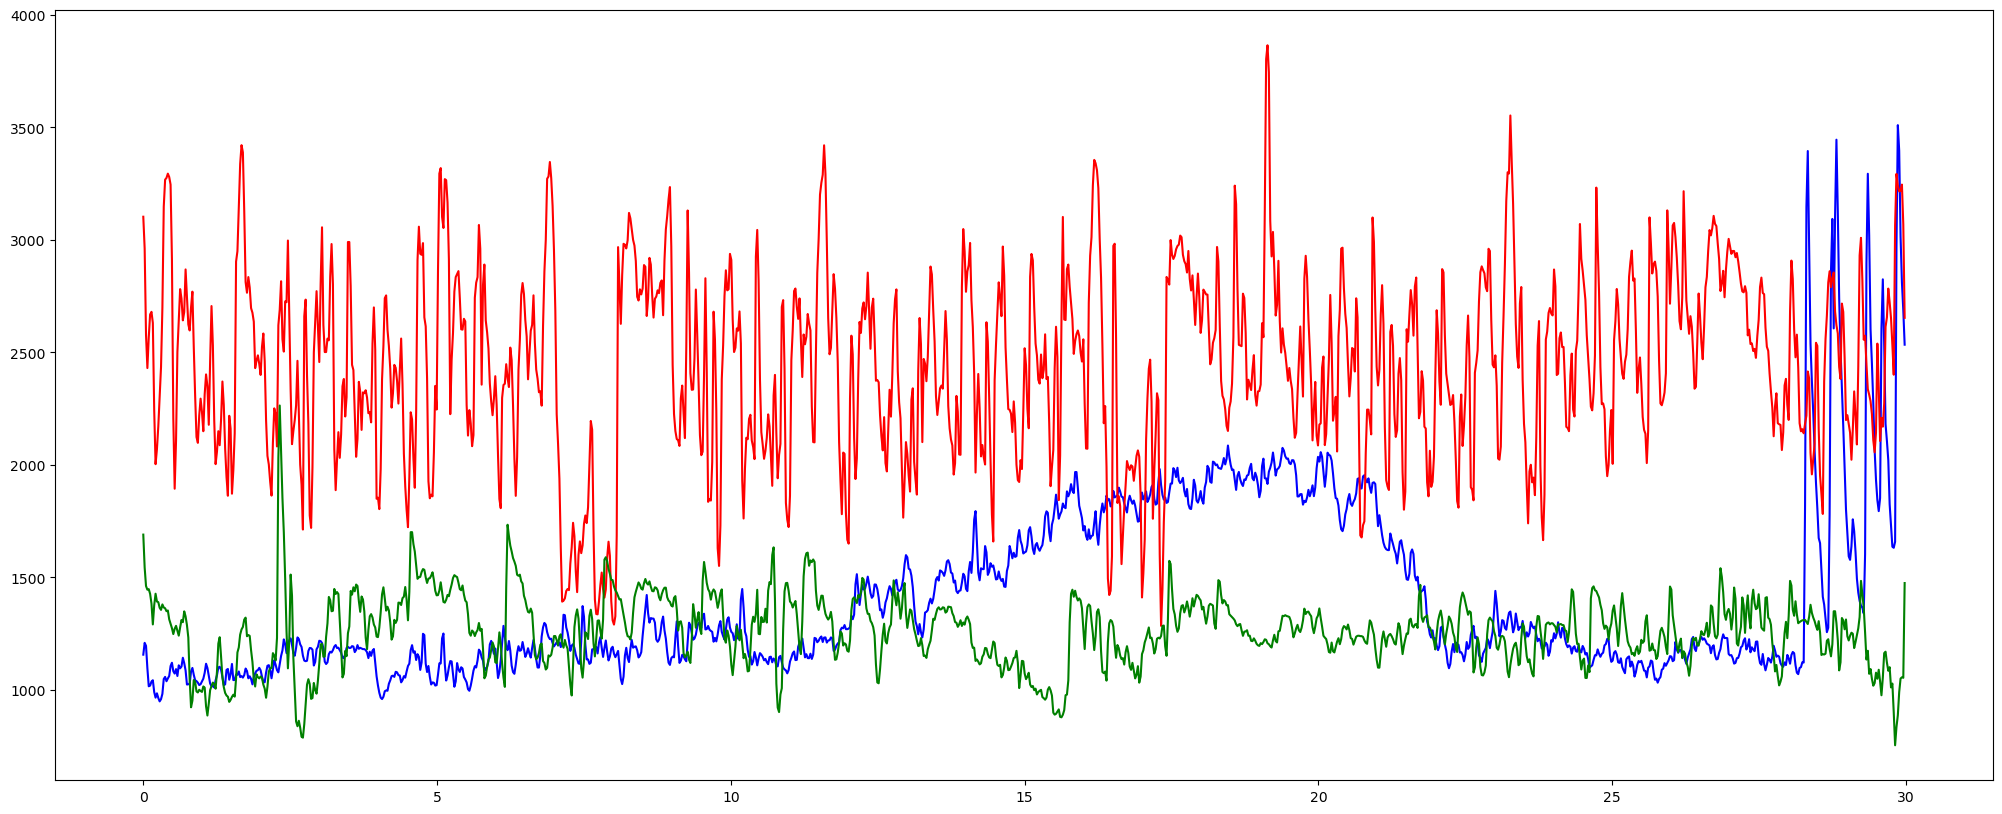

In [12]:
# Plot spectral centroids
plt.figure(figsize=(25, 10))

plt.plot(t, bw_debussy, color='b')
plt.plot(t, bw_redhot, color='r')
plt.plot(t, bw_duke, color='g')

plt.show()

Note that the spectral bandwidth looks pretty similar to the spectral centroids. This is natural, as they are correlated measures; the spectral centroid is used as a reference point for calculating the spectral bandwidth. Therefore, a large change in centroid will result in a large change in bandwidth